In [1]:
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df['Total Claim Amount'].unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

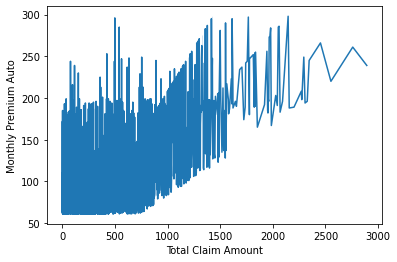

In [8]:
total_claim_vs_customer = df[['Total Claim Amount', 'Monthly Premium Auto']]
sns.lineplot(data = total_claim_vs_customer, x="Total Claim Amount", y= "Monthly Premium Auto" )

In [10]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
data_claims = df[["Total Claim Amount", "Number of Policies", "Number of Open Complaints","Months Since Policy Inception","Months Since Last Claim", "Monthly Premium Auto", "Income" ]]
data_claims

,Total Claim Amount,Number of Policies,Number of Open Complaints,Months Since Policy Inception,Months Since Last Claim,Monthly Premium Auto,Income
0,384.811147,1,0,5,32,69,56274
1,1131.464935,8,0,42,13,94,0
2,566.472247,2,0,38,18,108,48767
3,529.881344,7,0,65,18,106,0
4,138.130879,1,0,44,12,73,43836
...,...,...,...,...,...,...,...
9129,198.234764,2,0,89,18,73,71941
9130,379.200000,1,0,28,14,79,21604
9131,790.784983,2,3,37,9,85,0
9132,691.200000,3,0,3,34,96,21941


In [14]:
data_claims = data_claims.dropna()
data_claims

,Total Claim Amount,Number of Policies,Number of Open Complaints,Months Since Policy Inception,Months Since Last Claim,Monthly Premium Auto,Income
0,384.811147,1,0,5,32,69,56274
1,1131.464935,8,0,42,13,94,0
2,566.472247,2,0,38,18,108,48767
3,529.881344,7,0,65,18,106,0
4,138.130879,1,0,44,12,73,43836
...,...,...,...,...,...,...,...
9129,198.234764,2,0,89,18,73,71941
9130,379.200000,1,0,28,14,79,21604
9131,790.784983,2,3,37,9,85,0
9132,691.200000,3,0,3,34,96,21941


In [15]:
corr_data = data_claims.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,Total Claim Amount,Number of Policies,Number of Open Complaints,Months Since Policy Inception,Months Since Last Claim,Monthly Premium Auto,Income
Total Claim Amount,1.000000,-0.011100,-0.024694,-0.006569,-0.000782,0.522261,-0.401598
Number of Policies,-0.011100,1.000000,0.001523,-0.009546,0.011439,-0.006936,-0.010273
Number of Open Complaints,-0.024694,0.001523,1.000000,-0.013233,0.005736,-0.012751,0.006334
Months Since Policy Inception,-0.006569,-0.009546,-0.013233,1.000000,-0.048269,0.014596,-0.001945
Months Since Last Claim,-0.000782,0.011439,0.005736,-0.048269,1.000000,-0.005989,-0.025784
Monthly Premium Auto,0.522261,-0.006936,-0.012751,0.014596,-0.005989,1.000000,-0.017608
Income,-0.401598,-0.010273,0.006334,-0.001945,-0.025784,-0.017608,1.000000


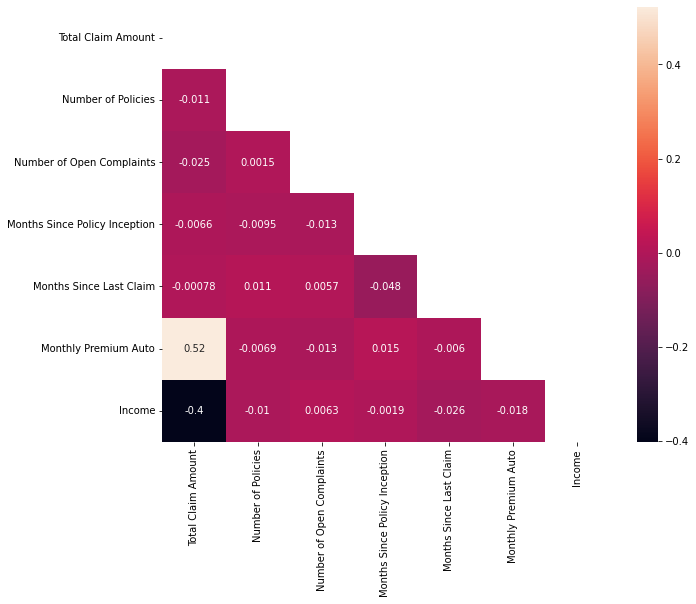

In [16]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [17]:
X = data_claims.drop(['Total Claim Amount'], axis=1)
y = data_claims['Total Claim Amount']


X = sm.add_constant(X)

model = sm.OLS(y,X,missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1638.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:07:36   Log-Likelihood:                -61427.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9127   BIC:                         1.229e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            72.3344      8.745      8.272      0.000      55.192      89.477
Number of Policies                0.1968      0.883      0.223      0.824      -1.534       1.928
Number of Open Complaints        -1.2115      2.318     -0.523      0.601      -5.756       3.332
Months Since Policy Inception    -0.1027      0.076     -1.356      0.175      -0.251       0.046
Months Since Last Claim          -0.1505      0.210     -0.718      0.473      -0.562       0.261
Monthly Premium Auto              5.2891      0.061     86.202      0.000       5.169       5.409
Income                           -0.0033   6.95e-05    -47.460      0.000      -0.003      -0.003
==============================================================================
Omnibus:                      993.739   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6355.332
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       7.037   Cond. No.                     2.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = data_claims.drop(['Total Claim Amount'], axis=1)
y = data_claims['Total Claim Amount']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 201.5782714551594
MAE: 144.4580275755036


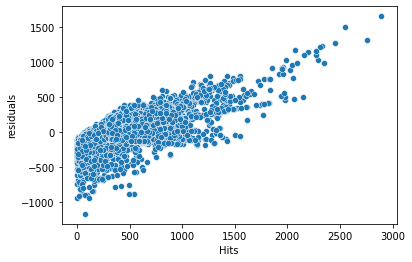

In [19]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()

<AxesSubplot:xlabel='Total Claim Amount'>

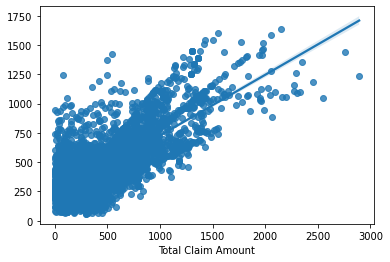

In [20]:
sns.regplot(y, predictions)